# 1. Assignment

## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

## Data Dictionary
ID: Customer ID

Age: Customer’s age in completed years

Experience: #years of professional experience

Income: Annual income of the customer (in thousand dollars)

ZIP Code: Home Address ZIP code.

Family: the Family size of the customer

CCAvg: Average spending on credit cards per month (in thousand dollars)

Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

Mortgage: Value of house mortgage if any. (in thousand dollars)

Personal_Loan: Did this customer accept the personal loan offered in the last campaign?

Securities_Account: Does the customer have securities account with the bank?

CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Do customers use internet banking facilities?

CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# Marking criteria
I am creating this section to faciliate the person who is reviewing this document

|Criteria|Points|Sections where I cover those areas
|:---|:---|:---	
    |Perform an Exploratory Data Analysis on the data|10|Section 3
|Illustrate the insights based on EDA|5|Section 4
|Data pre-processing|5|Section 5
|Model building - Logistic Regression|6|TBD
|Model performance evaluation and improvement|9|Section 6
|Model building - Decision Tree|6|Section 7 
|Model performance evaluation and improvement|9|Section 8 
|Actionable Insights & Recommendations|5|Section 9 
|Perform an Exploratory Data Analysis on the incorrectly predicted data|5| Section 10
|Notebook - Overall|5|IMHO - average quality|

# 2 Load the libraries

In [259]:
# Importing the regular librarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    classification_report,
    f1_score,
    roc_curve,
    roc_auc_score,
    auc,
    accuracy_score,
    recall_score,
)
from sklearn import metrics

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [261]:
# ignore those pesky warnings - it drives me nuts
# Ref: https://stackoverflow.com/questions/33792478/how-to-suppress-matplotlib-warning/34452373
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [262]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [263]:
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Perform an Exploratory Data Analysis on the data

In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [264]:
df_orig = pd.read_csv("Loan_Modelling.csv")
print(f"There are {df_orig.shape[0]} rows and {df_orig.shape[1]} columns.")  # f-string

There are 5000 rows and 14 columns.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [265]:
df = df_orig.copy()  # Make a copy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [266]:
# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)
# df.head()
# df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [268]:
# Check if any missing value
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIPCode               False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal_Loan         False
Securities_Account    False
CD_Account            False
Online                False
CreditCard            False
dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observation** No null values!

In [269]:
# In the sample data, I saw some experience  was -ve
# that was wierd, it could be data input error
df[df["Experience"] < 1]["Experience"].count()

118

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations**: We need to impute this later

In [270]:
# finding unique data
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [271]:
# Look at the data distribution
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [272]:
#### Using zipcode
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)
zipcode = search.by_zipcode("98038")
print(zipcode.county)

King County


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Let us find outliers

In [273]:
n = ["Age", "Income", "Experience", "CCAvg", "Mortgage"]
q1 = df[n].quantile(0.25)
q3 = df[n].quantile(0.75)
iqr = q3 - q1
output = (df[n] < (q1 - 1.5 * iqr)) | (df[n] > (q3 + 1.5 * iqr))
output.sum()

Age             0
Income         96
Experience      0
CCAvg         324
Mortgage      291
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

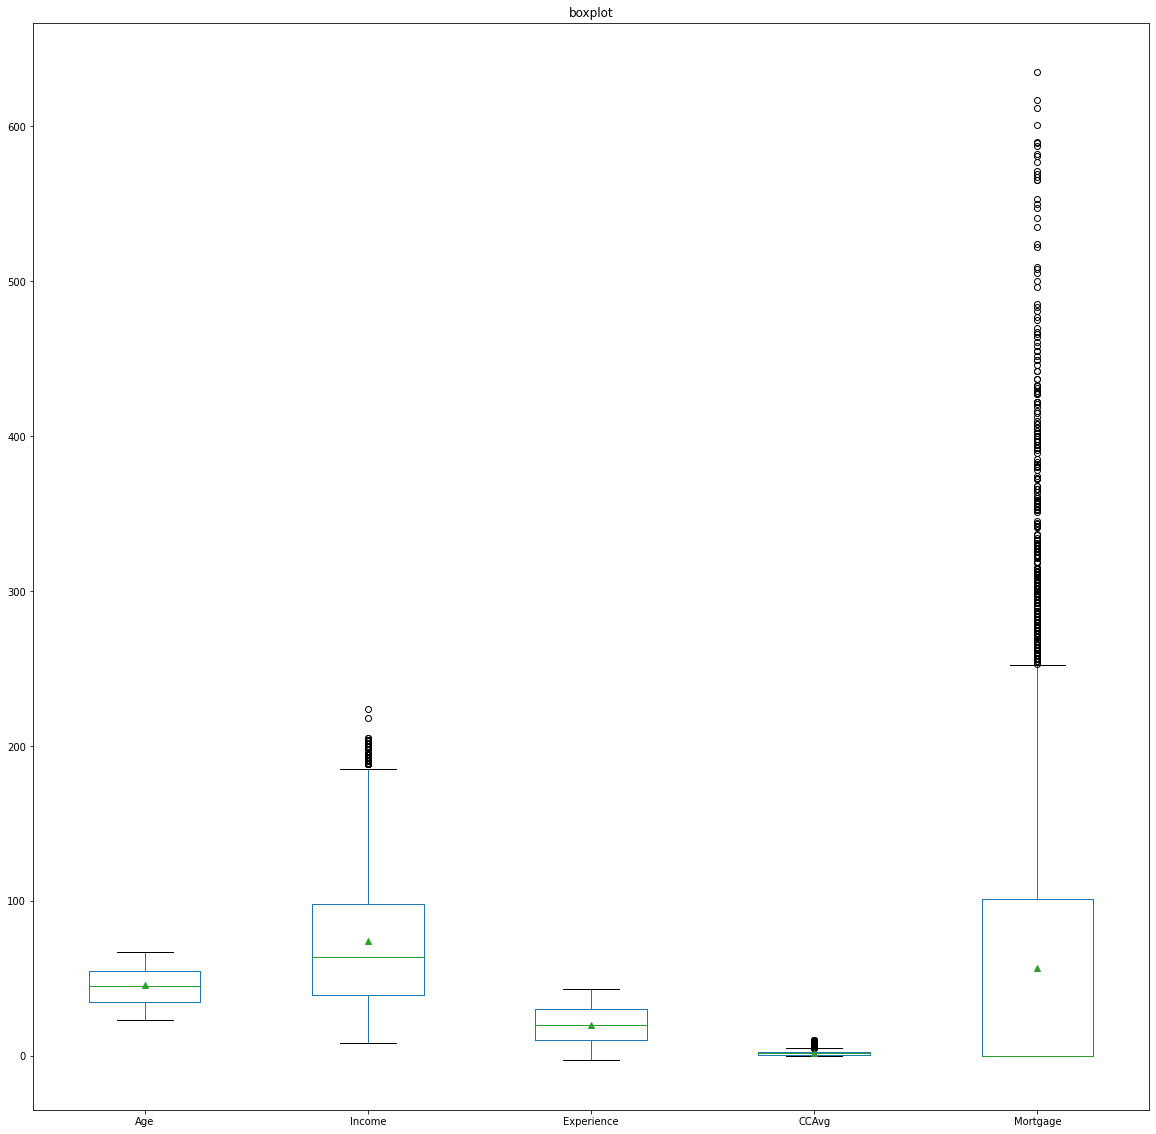

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [274]:
# Print all the box plots from n which is the list. I am too lazy to print each by each
# Code snippets
# https://stackoverflow.com/questions/27061137/plot-multiple-boxplot-in-one-graph-in-pandas-or-matplotlib/46452644
ax = df[n].plot(kind="box", title="boxplot", showmeans=True)
plt.rcParams["figure.figsize"] = (20, 20)
plt.show()

**Observations**: Outliers in Income, CCAvg, Mortgage. Need to remove/treat then

#TODO: Should we remove the outliers to make model better

## Distribution of numerical variables

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Experience'}>],
       [<AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Mortgage'}>, <AxesSubplot:>]],
      dtype=object)

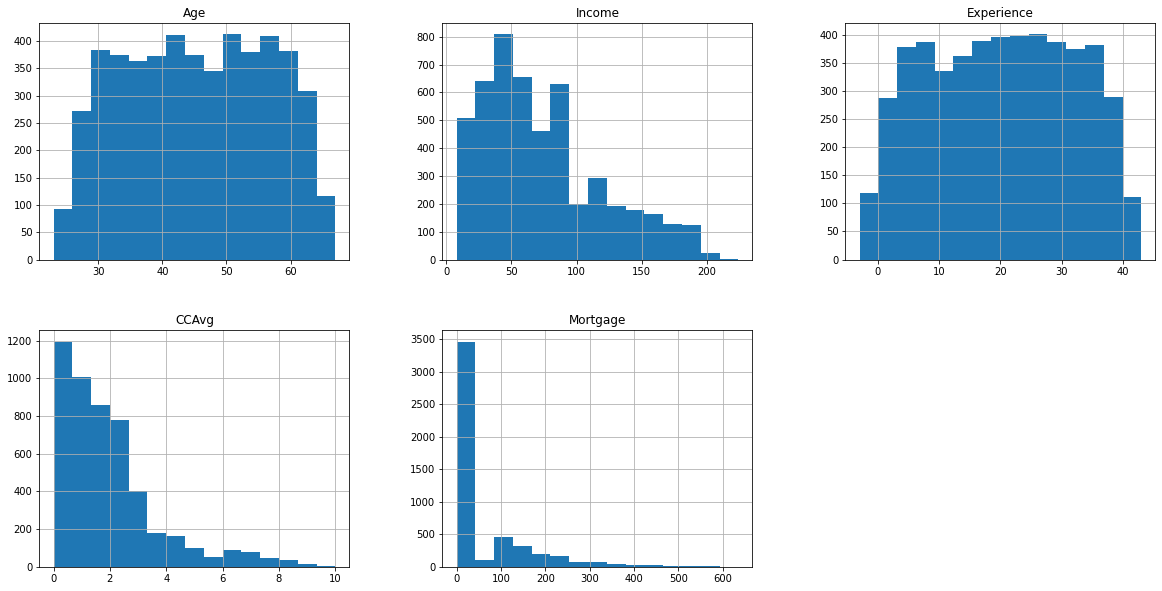

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [275]:
df[n].hist(bins=15, figsize=(20, 10), layout=(2, 3))

### Bivariate - Distribution of categorical features and their relation with the target feature

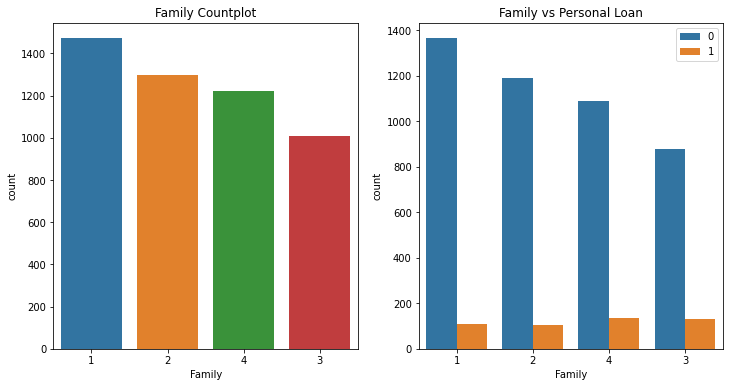

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [276]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax = sns.countplot(
    df["Family"],
    hue=df["Personal_Loan"],
    ax=axes[1],
    order=df["Family"].value_counts().index,
)
plt.legend()
ax.set_title("Family vs Personal Loan")
ax = sns.countplot(df["Family"], ax=axes[0], order=df["Family"].value_counts().index)
plt.legend()
ax.set_title("Family Countplot")
plt.show()

**Obervations** Most of the customers have family size 1.Most family of size 1 have accepted laons

Most of customers are interestingly undergrad and have accepted 
More than 2000 customres has Undergraduate and very less to accept for loan Customers who are Graduate and Professional are more likely to accept loan than undergraduate.

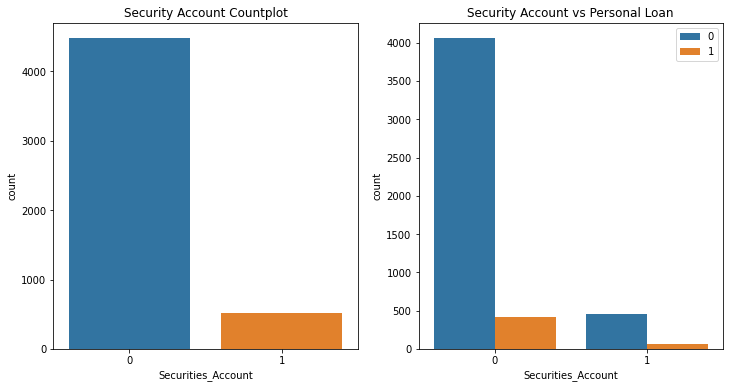

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [277]:
# Using sns.countplot() for visualizing the counts

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax = sns.countplot(df["Securities_Account"], hue=df["Personal_Loan"], ax=axes[1])
plt.legend()
ax.set_title("Security Account vs Personal Loan")
ax = sns.countplot(df["Securities_Account"], ax=axes[0])
plt.legend()
ax.set_title("Security Account Countplot")
plt.show()

Most customers don't have securities accont

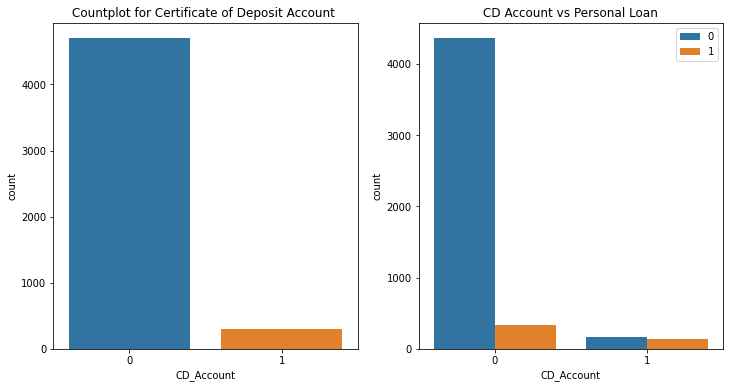

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [278]:
# Using sns.countplot() for visualizing the counts

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax = sns.countplot(df["CD_Account"], hue=df["Personal_Loan"], ax=axes[1])
plt.legend()
ax.set_title("CD Account vs Personal Loan")
ax = sns.countplot(df["CD_Account"], ax=axes[0])
plt.legend()
ax.set_title("Countplot for Certificate of Deposit Account ")
plt.show()

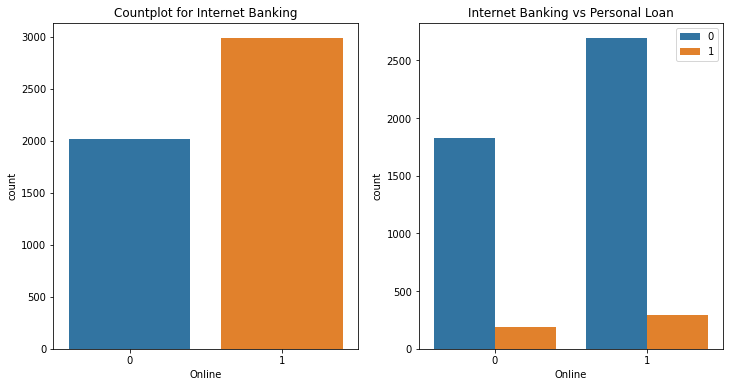

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [279]:
# Using sns.countplot() for visualizing the counts

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax = sns.countplot(df["Online"], hue=df["Personal_Loan"], ax=axes[1])
plt.legend()
ax.set_title("Internet Banking vs Personal Loan")
ax = sns.countplot(df["Online"], ax=axes[0])
plt.legend()
ax.set_title("Countplot for Internet Banking")
plt.show()

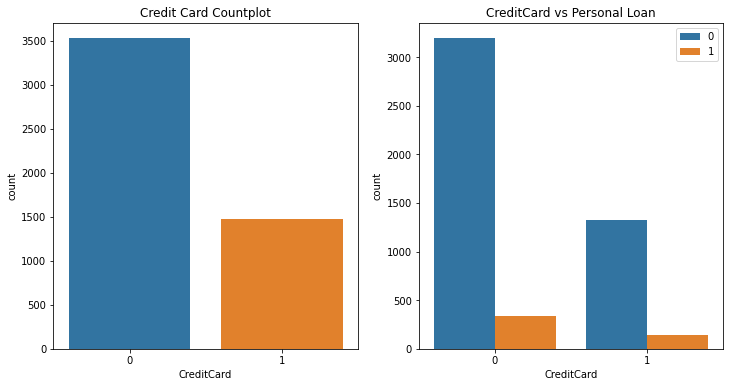

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [280]:
# Using sns.countplot() for visualizing the counts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax = sns.countplot(df["CreditCard"], hue=df["Personal_Loan"], ax=axes[1])
plt.legend()
ax.set_title("CreditCard vs Personal Loan")
ax = sns.countplot(df["CreditCard"], ax=axes[0])
plt.legend()
ax.set_title("Credit Card Countplot")
plt.show()

**Observations** Most customers don't have credit card

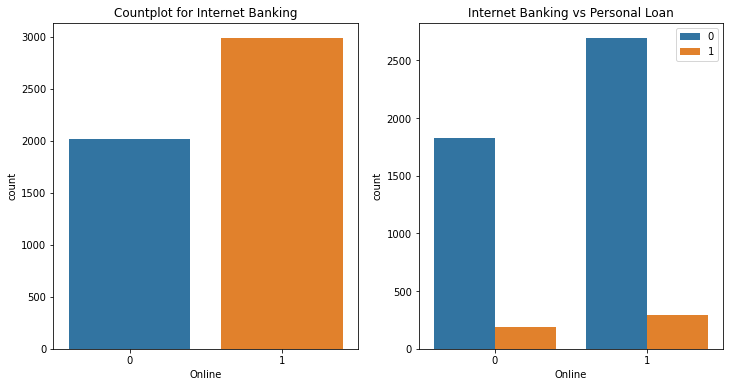

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [281]:
# Using sns.countplot() for visualizing the counts

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax = sns.countplot(df["Online"], hue=df["Personal_Loan"], ax=axes[1])
plt.legend()
ax.set_title("Internet Banking vs Personal Loan")
ax = sns.countplot(df["Online"], ax=axes[0])
plt.legend()
ax.set_title("Countplot for Internet Banking")
plt.show()

**Observations** Most customers use Online Banking

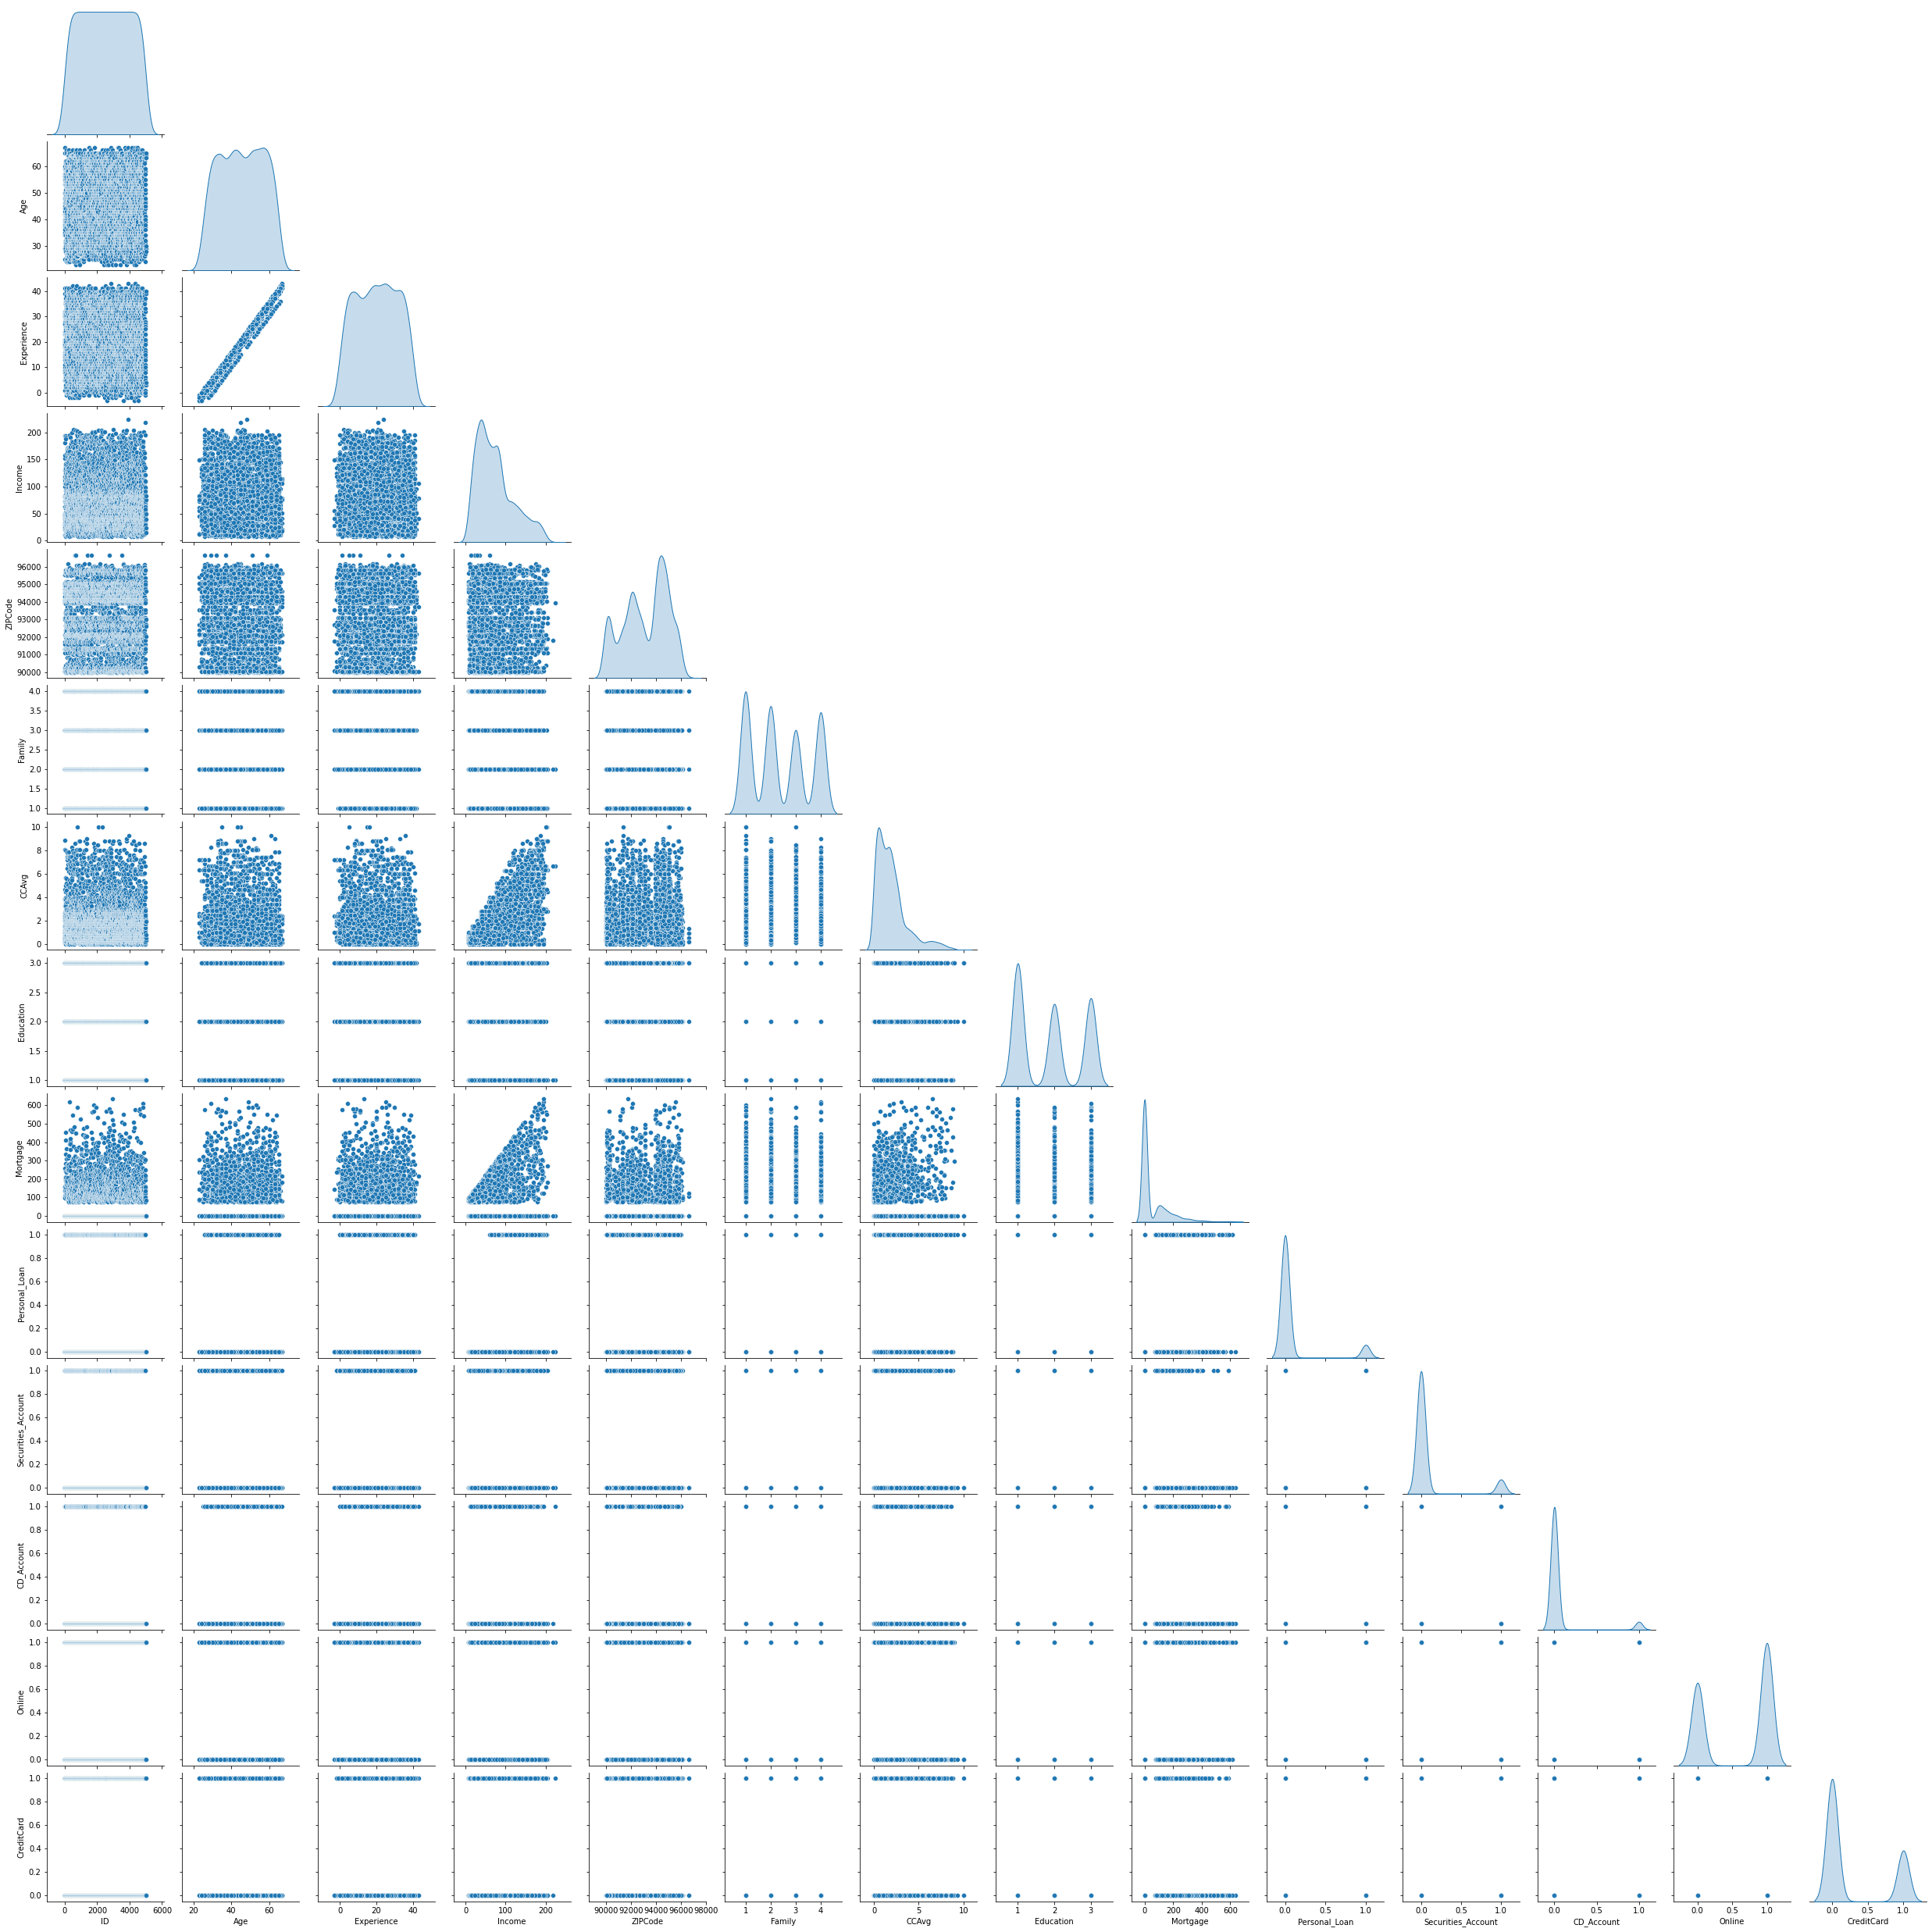

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [282]:
sns.pairplot(data=df, diag_kind="kde", corner=True)

# 4.  Illustrate the insights based on EDA

- Dataset (DS) has 5000 rows and 14 columns
- DS has 13 features - ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securites,Account, CD_Accont, Online, CreditCard

- ID: Not useful feature. we can drop it. 

- Income: positively skewed. Most of the customers have income between 45K and 55K

- Age: 3  peaks in distribution.Mean and median are equal. Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age

- Educaion : Mean and median ~ equal

- Experience : is normally distributed with more customer having experience starting from 8 years

- Personal_Loan: Target variable - need to remove

- ZIP Code: Sharp peaks shows that data are colletioned from specific places are higher. This can be a concern that the data is biased

- Mortage: High left skewness. 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

- Securities Account : Most customers don't have Securities accont

- CD account: Most customers dont have CD.

- Online: Most customers use online a/cs

- Credit Card: This attribute has less customers using CC in comparison to the CC users.

- Relationship between the attributes: Experience and age are in linear relationship. One can be dropped among them will not effect the accuracy.

- Outliers: Outliers in Income, CCAvg, Mortgage. Need to remove/treat then


## 4.1 Possiblie relationships  of some numerical features with target feature

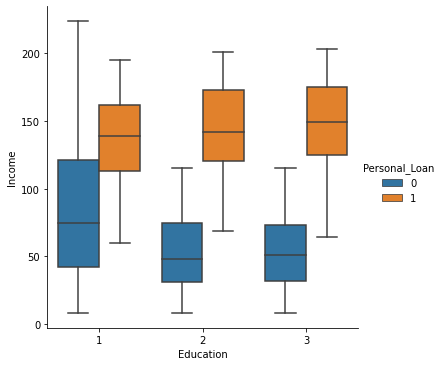

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [283]:
sns.catplot(x="Education", y="Income", data=df, kind="box", hue="Personal_Loan")

**Observations** Customer with income (120-170)K have taken the load. The high education level, the more likely they will take the loan

## 4.2 Distribution of target col

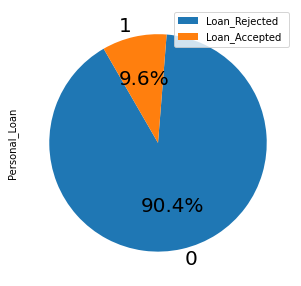

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [284]:
fig, ax = plt.subplots(figsize=(7, 5))
df["Personal_Loan"].value_counts(sort=False).plot(
    kind="pie", autopct="%1.1f%%", fontsize=20, startangle=120
)
plt.legend(["Loan_Rejected", "Loan_Accepted "])
plt.show()

**Observations** ~90% of loan were approved. That is a good sign, which means the vetting systems of the bank is working. (Though we need to realized approved does not mean ability to fullfil the loan obligations - another project - another time)

## 4.3 Correlation

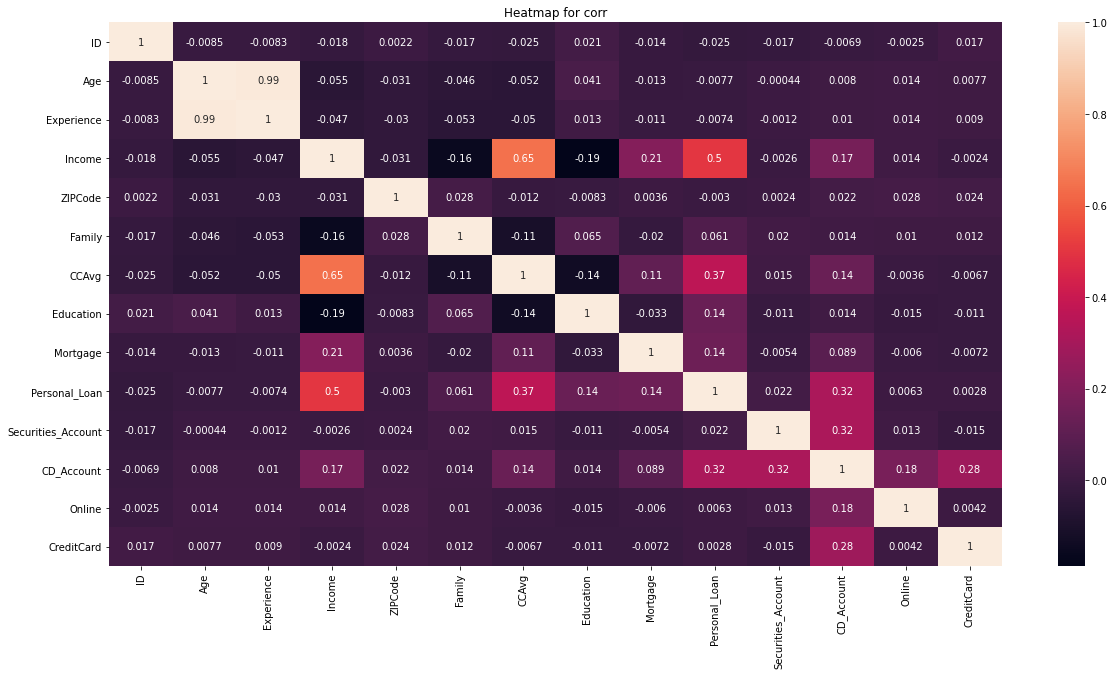

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [285]:
# Correl between variables and Target
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap for corr")
plt.show()

**Observations** 
- Income , CD Account and CCAvg column have little correlation with the Target column
- Income and CCavg are +vely correlated.
- experience and Age are highly correlated 

# 5. Data Pre-processing

## 5.1 Dropping irrelevant col / Data Cleaning

In [286]:
# ID has no corr with load. Drop it
# Added ignore because if col was dropped it was giving exceptions, when re-running- annoying!
# Ref: https://stackoverflow.com/questions/59116716/df-drop-if-it-exists
df.drop("ID", inplace=True, axis=1, errors="ignore")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [287]:
# check if it it dropped
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [288]:
# During Exploration, I saw Experience as -ve
# I will impute it with median age
ages = df[df["Experience"] < 0]["Age"].unique().tolist()
# print(ages)
# Creating a list of indexes.
idx = df[df["Experience"] < 0].index.tolist()
# print(idx)
# Replacing Negative Value with median.
for i in idx:
    for x in ages:
        df.loc[i, "Experience"] = df[
            (df.Age == x) & (df.Experience > 0)
        ].Experience.median()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [289]:
# checking if there are records with negative experience
# Before I had 52
df[df["Experience"] < 0]["Experience"].count()

0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [290]:
# Z-score Morgage as it has many outliers. (As per our EDA callout)
# I use this code for reference:
# https://medium.com/@rohanaggarwal45/thera-bank-case-with-univariate-as-well-as-bivariate-analysis-all-the-machine-learning-models-7f61d04eaa2a
from scipy import stats

df["Mortgage_zscore"] = np.abs(stats.zscore(df["Mortgage"]))
df = df[df["Mortgage_zscore"] < 3]
df.drop("Mortgage_zscore", axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [291]:
df.shape

(4895, 13)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations** The only data pre-processing I have done at this point is clean up the Experience. There a couple caveats that I would like bring up (more for me to remember)
- What about postal code? (Do we want to convert it to addresses?)
- ~What about outliers (Keep it or remove)~

Those points need to be remembered when doing the model building

## 5.2 Separating target col, splitting the data, Standardizing

### 5.2.1 Separation of targ col

In [292]:
# P_L is our target col. Put it in y
y = df["Personal_Loan"]
X = df.drop("Personal_Loan", axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [293]:
# TODOL I am making a design call to drop zipcode for now
X.drop("ZIPCode", axis=1, inplace=True, errors="Ignore")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [294]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,1,0
4996,30,4.0,15,4,0.4,1,85,0,0,1,0
4997,63,39.0,24,2,0.3,3,0,0,0,0,0
4998,65,40.0,49,3,0.5,2,0,0,0,1,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [295]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal_Loan, Length: 4895, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 5.2.2 Splitting

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 5.2.3 Scaling features - lead to bettter modelling

In [297]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6. Model building - Logistic Regression

In [298]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_accu_test = lr.score(X_test_scaled, y_test)
lr_accu_train = lr.score(X_train_scaled, y_train)
lr_f1 = f1_score(y_test, lr_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 6.1 Model performance evaluation and improvement


In [299]:
lr_prob = lr.predict_proba(X_test_scaled)
lr_fpr,lr_tpr,lr_thresh=roc_curve(y_test,lr_prob[:,1])
lr_auc = auc(lr_fpr,lr_tpr)
print("Area under the curve for  Logistic Regression ", lr_auc)


Area under the curve for  Logistic Regression  0.9620168767579956


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>

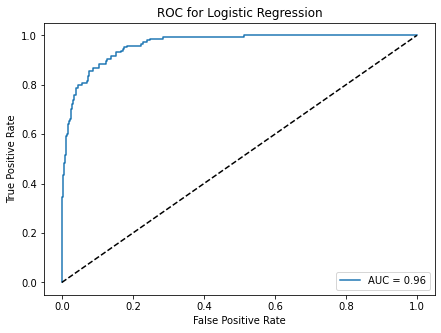

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [300]:
# Plot the ROC curve
plt.clf()
plt.figure(figsize=(7, 5))
plt.plot(lr_fpr, lr_tpr, label="AUC = %0.2f" % lr_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

In [301]:
print("Training Accuracy :", lr_accu_train)
print("Testing accuracy  :", lr_accu_test)
print("F1 Score :", lr_f1)
print("Logistic Regression Confusion matrix :\n\n", confusion_matrix(y_test, lr_pred))

Training Accuracy : 0.9576765907764156
Testing accuracy  : 0.9455411844792376
F1 Score : 0.689922480620155
Logistic Regression Confusion matrix :

 [[1300   24]
 [  56   89]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 7. Model building - Decision Tree

In [302]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=1)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
dt_training = dt.score(X_train_scaled, y_train)
dt_testing = dt.score(X_test_scaled, y_test)
dt_precision = precision_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 7.1 Model performance evaluation and improvement

In [303]:
print("Traing Accuracy :", dt_training)
print("Testing Accuracy :", dt_testing)
print("F1 Score: ", dt_f1)
print("Decision Tree Confusion matrix :\n\n", confusion_matrix(y_test, dt_pred))

Traing Accuracy : 0.9159369527145359
Testing Accuracy : 0.9012933968686181
F1 Score:  0.0
Decision Tree Confusion matrix :

 [[1324    0]
 [ 145    0]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 8 Comparing Logistics Regression and Decision Tree

In [304]:
df_compare = pd.DataFrame(
    [
        [lr_accu_train, lr_accu_test, lr_f1],
        [dt_training, dt_testing, dt_f1],
    ],
    columns=["Training Accuracy", "Testing Accuracy", "F1Score"],
    index=[
        "Logistic Regression",
        "DecisionTrees",
    ],
)
df_compare

,Training Accuracy,Testing Accuracy,F1Score
Logistic Regression,0.957677,0.945541,0.689922
DecisionTrees,0.915937,0.901293,0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 9. Actionable Insights & Recommendations

- Testing as well as training accuracy is highest for Logistic Regression
- I need to stress the choice of accuracy for this model is the driving factor (instead of recall or precision)
- I suspect as the presence of outliers might have made Decision Tree accuracy lower. 

**Conclusion**
I am using Accuracy because the business goal is to predict liability of customers with min, budget to get a loan.
We want to have a model with min of FP.

# 10. Perform an Exploratory Data Analysis on the incorrectly predicted data

I don't how to do this. I know what is needed to do though
- Use the LR model to identify the FN (I ain't sure on how to do it via code and could not find any samples from the lecture or google)
- Feed the LR with the FN datapoints
- Perform sns.paiplot to discerns patterns

# Appendix

[1] https://www.kaggle.com/rikks008/loan-modelling-using-all-supervised-models# <br>
[2] https://medium.com/@rohanaggarwal45/thera-bank-case-with-univariate-as-well-as-bivariate-analysis-all-the-machine-learning-models-7f61d04eaa2a